## Classification Trees
Ela é bem semelhante à árvore de regressão, a diferença é só que estamos tentando prever uma classe e, portanto, o $\hat{y}_{R_m}$ é dado pela **maioria** da região $R_m$.

Entretanto, o **$RSS$ não pode ser usado** como critério de ramificação da árvore e, portanto, temos alguns métodos alternativos:

**Classification error rate**: é simplesmente a fração entre as observações de treino na região $R_m$ que **não pertencem** ao grupo da **classe mais comum**
$$Erro = 1 - max_{k}(\hat{p}_{mk})$$

Sendo:

$\hat{p}_{mk}$: proporção de observações na região $R_m$ que são da classe $k$ e

Entretanto, essa métrica não costuma ser muito usada pela pouca sensbilidade, sendo substituídas pelas seguintes métricas:

**Gini**: o índice Gini é definido pela seguinte equação
$$Gini = \sum_{k=1}^{K}\hat{p}_{mk} (1 - \hat{p}_{mk})$$

Sendo:
- $K$: conjunto de classes
- $\hat{p}_{mk}$: proporção de observações na região $R_m$ que são da classe $k$

Ou seja, o índice Gini é basicamente a soma dos produtos da proporção que pertence ou não à classe de cada região para cada uma das classes. Vale verificar também que se a proporção for muito próxima de 1 então o índice Gini se aproxima de zero. Ele é considerado também uma métrica de "pureza" dos nós, dado o funcionamento descrito acima.

**Entropia**: basicamente mede o quanto de incerteza temos em cada região
$$D = - \sum_{k=1}^{K} \hat{p}_{mk} log(\hat{p}_{mk})$$

Dado que $0 \leq \hat{p}_{mk} \leq 1$, segue que $0 \leq -\hat{p}_{mk}$. Dado seu cálculo, é possível verificar que a entropia fica próxima de zero se os valores $\hat{p}_{mk}$ são todos próximos de zero ou próximos de 1. Portanto, assim como no índice Gini, ele terá um valor baixo se $m$-ésimo nó é puro. Além disso, o índice Gini e a Entropia são bem similares numericamente.

**Atenção**
Apesar das métricas Gini e Entropia serem mais utilizadas, caso o objetivo do modelo é ter uma acurácia alta, a métrica de **Classification error rate** tem preferência.


## Treinamento

In [1]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Carregar dataset de exemplo (Iris)
data = load_iris()
X = data.data  # Características
y = data.target  # Target
feature_names = data.feature_names
target_names = data.target_names

# Criar DataFrame para melhor visualização
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Primeiras 5 linhas do dataset:")
print(df.head())
print(f"\nShape do dataset: {df.shape}")
print(f"\nClasses: {target_names}")

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

# Criar e treinar o modelo de árvore de decisão
model = DecisionTreeClassifier(
    max_depth=3,          # Profundidade máxima da árvore
    random_state=42,      # Semente para reprodutibilidade
    criterion='gini'      # Critério de divisão (gini ou entropy)
)

# Treinar o modelo
model.fit(X_train, y_train)

c:\Users\Lucas\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Primeiras 5 linhas do dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Shape do dataset: (150, 6)

Classes: ['setosa' 'versicolor' 'virginica']

Tamanho do conjunto de treino: 105
Tamanho do conjunto de teste: 45


DecisionTreeClassifier(max_depth=3, random_state=42)

## Avaliação


Acurácia do modelo: 0.9778

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



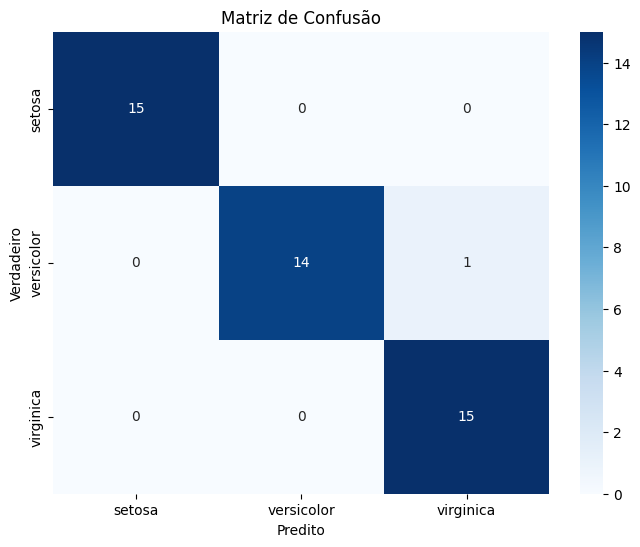

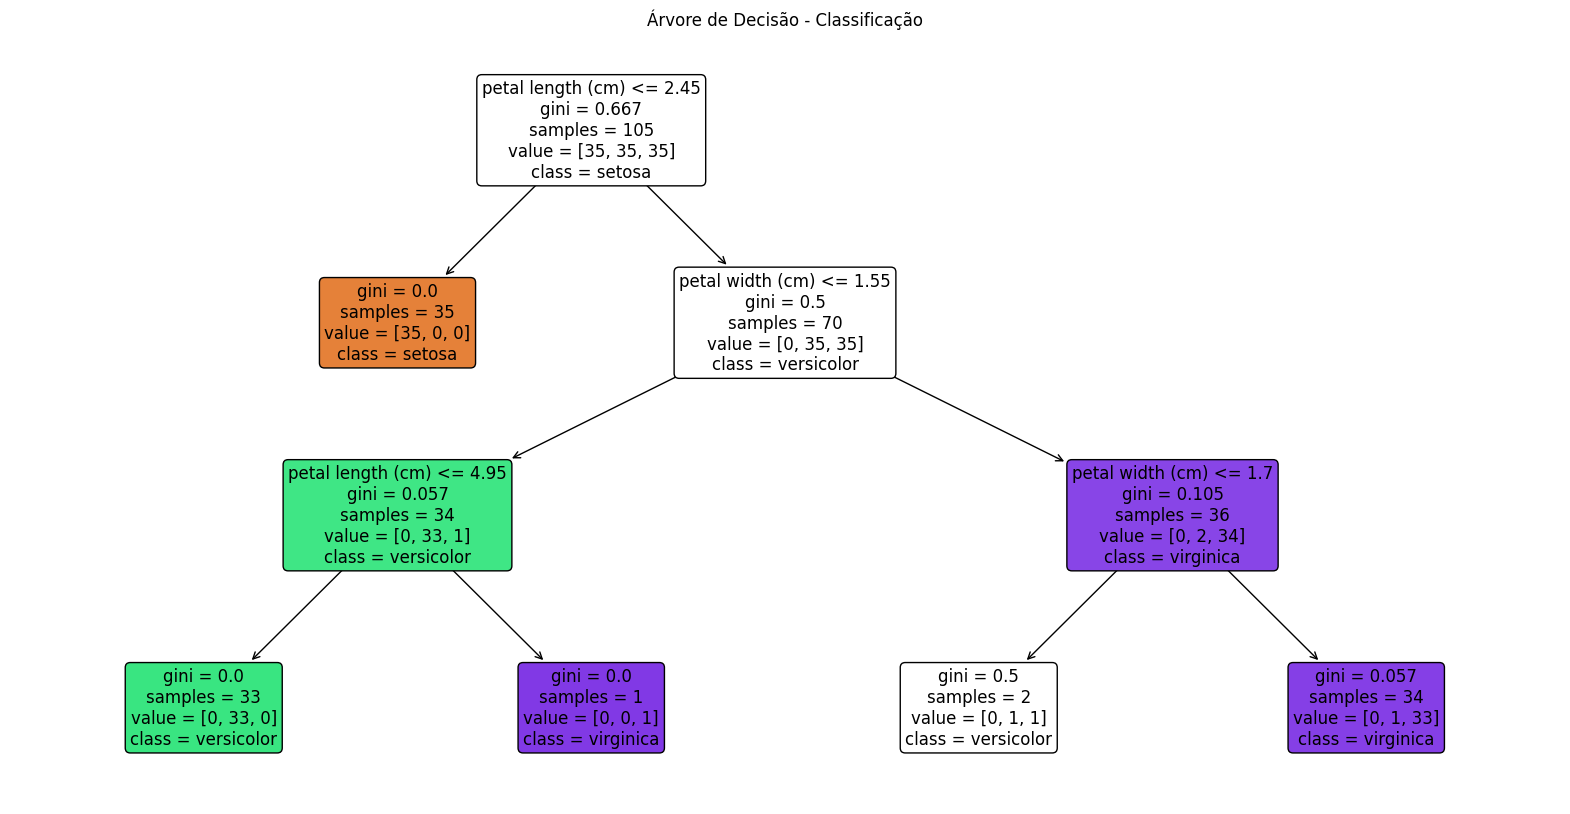

In [2]:
# Fazer previsões
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo: {accuracy:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Matriz de confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.show()

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(model, 
          feature_names=feature_names, 
          class_names=target_names, 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Árvore de Decisão - Classificação")
plt.show()

## Importância de Features


Importância das Features:
             feature  importance
2  petal length (cm)    0.550877
3   petal width (cm)    0.449123
0  sepal length (cm)    0.000000
1   sepal width (cm)    0.000000


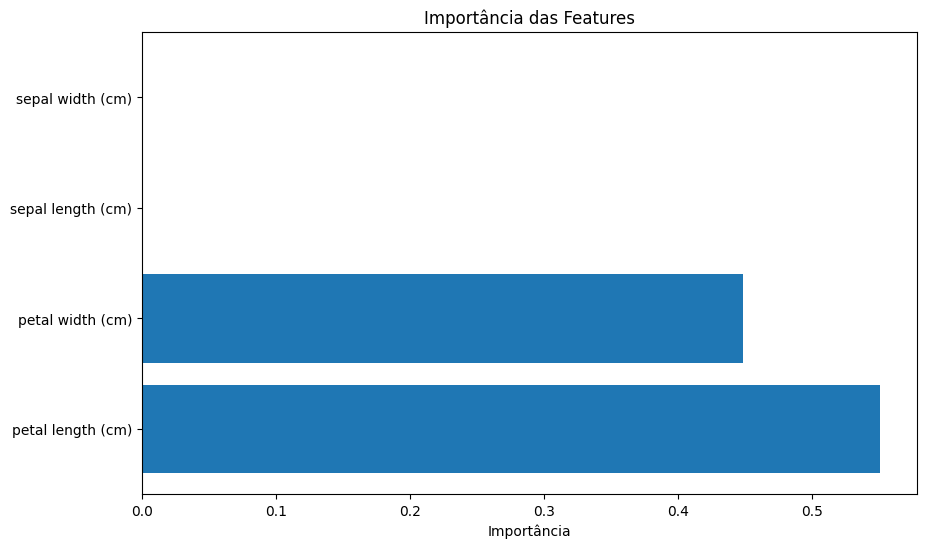


Exemplo de previsão:
Características: [5.1 3.5 1.4 0.2]
Classe predita: setosa
Probabilidades: {'setosa': 1.0, 'versicolor': 0.0, 'virginica': 0.0}

Acurácia com validação cruzada (5 folds): 0.9733 (+/- 0.0499)


In [3]:
# Importância das features
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nImportância das Features:")
print(feature_importance)

# Gráfico de importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Importância das Features')
plt.xlabel('Importância')
plt.show()

# Exemplo de previsão para uma nova amostra
nova_amostra = np.array([[5.1, 3.5, 1.4, 0.2]])  # Exemplo de uma flor
predicao = model.predict(nova_amostra)
probabilidades = model.predict_proba(nova_amostra)

print(f"\nExemplo de previsão:")
print(f"Características: {nova_amostra[0]}")
print(f"Classe predita: {target_names[predicao[0]]}")
print(f"Probabilidades: {dict(zip(target_names, probabilidades[0].round(4)))}")

# Opcional: Validação cruzada para melhor avaliação
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print(f"\nAcurácia com validação cruzada (5 folds): {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")